In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

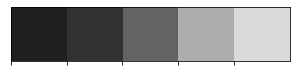

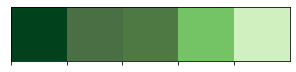

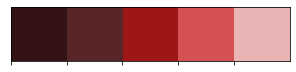

In [75]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [76]:
import os

In [77]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
         #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.COLOR_BGR2RGB)
            img=cv.resize(img,(150,150),interpolation=cv.INTER_AREA)
            img=img.astype('float32')
            img/=255
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data,class_name=create_dataset(r"D:\PROJECTS\MINI\BRAIN TUMOUR DATASETS\dataset1\Training")
            

In [78]:
len(img_data)

2870

In [79]:
len(class_name)

2870

In [80]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
         #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.COLOR_BGR2RGB)
            img=cv.resize(img,(150,150),interpolation=cv.INTER_AREA)
            img=img.astype('float32')
            img/=255
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data1,class_name1=create_dataset(r"D:\PROJECTS\MINI\BRAIN TUMOUR DATASETS\dataset1\Testing")
            

In [81]:
len(class_name1)

394

In [82]:
import numpy as np
target_dict={k:v for v,k in enumerate(np.unique(class_name))}
target_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [83]:
target_val=[target_dict[class_name[i]] for i in range(len(class_name))]

In [84]:
target_val1=[target_dict[class_name1[i]] for i in range(len(class_name1))]

In [85]:
X_train=np.array(img_data, np.uint32)

In [86]:
Y_train=np.array(list(map(int,target_val)), np.uint32)

In [87]:
X_test=np.array(img_data1, np.uint32)

In [88]:
Y_test=np.array(list(map(int,target_val1)), np.uint32)

In [89]:
Y_train.shape

(2870,)

In [90]:
X_train.shape

(2870, 150, 150, 3)

In [91]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,InputLayer,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

In [92]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [93]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [94]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))  
model.add(Dense(7, activation='softmax'))
          
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_13 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                      

In [96]:
# model.fit(x=np.array(tf.expand_dims(img_data,axis=-1), np.float32), y=np.array(list(map(int,target_val)), np.float32),batch_size=120,epochs=80,validation_data=(np.array(tf.expand_dims(img_data1,axis=-1), np.float32),np.array(list(map(int,target_val1)), np.float32)),callbacks=es)

In [ ]:
history=model.fit(X_train,Y_train,batch_size=100,epochs=20,validation_data=(X_test,Y_test),callbacks=es)

Epoch 1/20
29/29 [==============================] - 199s 7s/step - loss: 1.8436 - accuracy: 0.2927 - val_loss: 1.7836 - val_accuracy: 0.2538
Epoch 2/20
29/29 [==============================] - 204s 7s/step - loss: 1.4147 - accuracy: 0.3366 - val_loss: 1.6958 - val_accuracy: 0.2538
Epoch 3/20
29/29 [==============================] - 238s 8s/step - loss: 1.2956 - accuracy: 0.3390 - val_loss: 1.6338 - val_accuracy: 0.2563
Epoch 4/20
29/29 [==============================] - 239s 8s/step - loss: 1.2881 - accuracy: 0.3355 - val_loss: 1.5848 - val_accuracy: 0.2360
Epoch 5/20
29/29 [==============================] - 235s 8s/step - loss: 1.2544 - accuracy: 0.3470 - val_loss: 1.5728 - val_accuracy: 0.2360
Epoch 6/20
29/29 [==============================] - 326s 11s/step - loss: 1.2836 - accuracy: 0.3470 - val_loss: 1.5630 - val_accuracy: 0.2284
Epoch 7/20
29/29 [==============================] - 201s 7s/step - loss: 1.2691 - accuracy: 0.3498 - val_loss: 1.4763 - val_accuracy: 0.2944
Epoch 8/20
2

In [94]:
path1=r"D:\PROJECTS\MINI\BRAIN TUMOUR DATASETS\MINIDEPLOY\densnet121.h5"
import tensorflow as tf
# i
# Load the model from the file
model = tf.keras.models.load_model(path1)

# Use the model for predictions
# y_pred = model.predict(X_test)


In [95]:
import keras
feature_extractor = keras.Model(inputs=model.inputs,outputs=model.get_layer(name="final").output,)

In [130]:
import cv2 as cv
import numpy as np
img=cv.imread(r"D:\PROJECTS\MINI\BRAIN TUMOUR DATASETS\dataset2\Testing\glioma\Te-gl_0173.jpg",cv.IMREAD_GRAYSCALE)
img=cv.resize(img,(224,224),interpolation=cv.INTER_LANCZOS4)
img=img.astype('float32')
img/=255
img=np.expand_dims(img,axis=0)
features =list(feature_extractor(img))

In [131]:
list(features)

[<tf.Tensor: shape=(2048,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>]

In [136]:
l=[]
for i in list(features):
    for j in list(i): 
        l.append(np.float32(j))

In [137]:
len(l)

2048

In [138]:
final_features=list(np.array(l).reshape(1,-1))

In [139]:
final_features

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [140]:
import pickle

# Load the model from the file
with open("D:\PROJECTS\MINI\BRAIN TUMOUR DATASETS\MINIDEPLOY\model.pkl", 'rb') as file:
    model_r= pickle.load(file)

# Use the model for predictions
# y_pred = model.predict(X_test)


In [156]:
prediction=model_r.predict(final_features)

In [157]:
prediction

array(['[1. 0. 0. 0.]'], dtype=object)

In [158]:
prediction=list(prediction)[0].strip('[]').split().index('1.')

In [159]:
prediction

0

In [152]:
# prediction.index('1.')

In [153]:
import os

In [154]:
p=os.getcwd()

In [155]:
p

'C:\\Users\\surya\\MINI'

In [160]:
tu={
            "0":"glioma",
            "1":"menengioma",
            "2":"notumour",
            "3":"pitutary"
        }

In [163]:
tu["3"]

'pitutary'